In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [78]:
df= pd.read_csv('ckd.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [79]:
df.shape

(400, 26)

In [80]:
df.drop('id', axis = 1, inplace = True)

In [81]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [82]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [83]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [85]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [87]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [88]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [89]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [90]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')


In [91]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [92]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [93]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [94]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [95]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)
    
def impute_median(feature):
    df[feature]=df[feature].fillna(df.median())


def impute_mean(feature):
    df[feature]=df[feature].fillna(df.mean())

In [96]:
for col in num_cols:
    random_value_imputation(col)

In [97]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [98]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col) #impute with mode
    #impute_median(col) #impute with median
    #impute_mean(col) #impute with mean

In [99]:
df[cat_cols].isnull().sum()


red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [100]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [102]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,141.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,100.0,18.0,0.8,146.0,4.0,11.3,38.0,6000.0,4.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,146.0,3.4,9.6,31.0,7500.0,4.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,150.0,5.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [103]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.821875
Test Accuracy of KNN is 0.6625 

Confusion Matrix :- 
[[29 23]
 [ 4 24]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.56      0.68        52
           1       0.51      0.86      0.64        28

    accuracy                           0.66        80
   macro avg       0.69      0.71      0.66        80
weighted avg       0.75      0.66      0.67        80



In [110]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[51  1]
 [ 3 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.96      0.89      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [111]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [112]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
0.990625


In [113]:
#Oversampling using SMOTE 
#Synthetic Minority Oversampling Techniqe uses KNN algorithm to produce synthetic samples from the dataset
df2=df.copy()
X= df2.drop('class', axis='columns')
y=df2['class']


In [114]:
y.value_counts()

0    250
1    150
Name: class, dtype: int64

In [115]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()
#random oversampling 
#from imblearn.over_sampling import RandomOverSampler as RoS
#ros=RoS(random_state=0)
#X_sm,y_sm=ros.fit_resample(X,y)
#random undersamping
#from imblearn.under_sampling import RandomUnderSampler as RuS
#rus=RuS(random_state=0)
#X_sm,y_sm=ros.fit_resample(X,y)

0    250
1    250
Name: class, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)


In [117]:
y_train.value_counts()

0    200
1    200
Name: class, dtype: int64

In [118]:
y_test.value_counts()

1    50
0    50
Name: class, dtype: int64

In [119]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier with SMOTE is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier with SMOTE is 0.95 

Confusion Matrix :- 
[[48  2]
 [ 3 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.96      0.94      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [120]:
#using KNN without sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn_df= df.copy() #copying original dataframe to use KNN

knn_X_train,knn_X_test,knn_y_train,knn_y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(knn_X_train,knn_y_train)

#performance metrics
knn_acc = accuracy_score(knn_y_test, classifier.predict(knn_X_test))

print(f"Training Accuracy of KNN classifier without sampling is {accuracy_score(knn_y_train, classifier.predict(knn_X_train))}")
print(f"Test Accuracy of KNN classifier without sampling is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test, classifier.predict(knn_X_test))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test, classifier.predict(knn_X_test))}")

Training Accuracy of KNN classifier without sampling is 0.86875
Test Accuracy of KNN classifier without sampling is 0.675 

Confusion Matrix :- 
[[34 16]
 [10 20]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        50
           1       0.56      0.67      0.61        30

    accuracy                           0.68        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.69      0.68      0.68        80



In [121]:
#KNN classifier with SMOTE 
knn_df2= df2.copy() #copy of df2 (uses SMOTE)

knn_X_train2,knn_X_test2,knn_y_train2,knn_y_test2=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier.predict(knn_X_test2))

print(f"Training Accuracy of KNN (k=3) classifier with SMOTE is {accuracy_score(knn_y_train2, classifier.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN (k=3) classifier with SMOTE is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier.predict(knn_X_test2))}")

Training Accuracy of KNN (k=3) classifier with SMOTE is 0.89
Test Accuracy of KNN (k=3) classifier with SMOTE is 0.71 

Confusion Matrix :- 
[[28 22]
 [ 7 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.56      0.66        50
           1       0.66      0.86      0.75        50

    accuracy                           0.71       100
   macro avg       0.73      0.71      0.70       100
weighted avg       0.73      0.71      0.70       100



In [122]:
#Inference: SMOTE has  significant improvement on accuracy when KNN is used from 0.6 to 0.69

#KNN with K=5 (with SMOTE)
classifier2=KNeighborsClassifier(n_neighbors=5)
classifier2.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier2.predict(knn_X_test2))

print(f"Training Accuracy of KNN classifier without sampling and K=5 is {accuracy_score(knn_y_train2, classifier2.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN classifier without sampling and K=5 is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier2.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier2.predict(knn_X_test2))}")

Training Accuracy of KNN classifier without sampling and K=5 is 0.83
Test Accuracy of KNN classifier without sampling and K=5 is 0.66 

Confusion Matrix :- 
[[26 24]
 [10 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.52      0.60        50
           1       0.62      0.80      0.70        50

    accuracy                           0.66       100
   macro avg       0.67      0.66      0.65       100
weighted avg       0.67      0.66      0.65       100



In [123]:
#inference: with k=5, lowered accuracy from 0.71 to 0.7

#KNN with k=7 with SMOTE
classifier3=KNeighborsClassifier(n_neighbors=7)
classifier3.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier3.predict(knn_X_test2))

print(f"Training Accuracy of KNN classifier without sampling and K=7 is {accuracy_score(knn_y_train2, classifier3.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN classifier without sampling and K=7 is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier3.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier3.predict(knn_X_test2))}")

Training Accuracy of KNN classifier without sampling and K=7 is 0.81
Test Accuracy of KNN classifier without sampling and K=7 is 0.61 

Confusion Matrix :- 
[[24 26]
 [13 37]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.65      0.48      0.55        50
           1       0.59      0.74      0.65        50

    accuracy                           0.61       100
   macro avg       0.62      0.61      0.60       100
weighted avg       0.62      0.61      0.60       100



In [124]:
#inference: with k=7, the accuracy is lowered further from 0.7 to 0.67
#KNN with k=9
classifier4=KNeighborsClassifier(n_neighbors=9)
classifier4.fit(knn_X_train2,knn_y_train2)

#performance metrics
knn_acc = accuracy_score(knn_y_test2, classifier4.predict(knn_X_test2))

print(f"Training Accuracy of KNN classifier without sampling and K=9 is {accuracy_score(knn_y_train2, classifier4.predict(knn_X_train2))}")
print(f"Test Accuracy of KNN classifier without sampling and K=9 is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(knn_y_test2, classifier4.predict(knn_X_test2))}\n")
print(f"Classification Report :- \n {classification_report(knn_y_test2, classifier4.predict(knn_X_test2))}")

Training Accuracy of KNN classifier without sampling and K=9 is 0.77
Test Accuracy of KNN classifier without sampling and K=9 is 0.6 

Confusion Matrix :- 
[[22 28]
 [12 38]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.65      0.44      0.52        50
           1       0.58      0.76      0.66        50

    accuracy                           0.60       100
   macro avg       0.61      0.60      0.59       100
weighted avg       0.61      0.60      0.59       100



In [125]:
#Logistic regression (with SMOTE) 
#X_train,X_test, y_train, y_test already sampled using SMOTE

from sklearn.linear_model import LogisticRegression
logistic_regressor= LogisticRegression(random_state=16).fit(X_train, y_train)
y_pred = logistic_regressor.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)

log_acc = accuracy_score(y_test, logistic_regressor.predict(X_test))

print(f"Training Accuracy of logistic regression with SMOTE 9 is {accuracy_score(y_train, logistic_regressor.predict(X_train))}")
print(f"Test Accuracy of logistic regression with SMOTE is {log_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, logistic_regressor.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, logistic_regressor.predict(X_test))}")

Training Accuracy of logistic regression with SMOTE 9 is 0.92
Test Accuracy of logistic regression with SMOTE is 0.89 

Confusion Matrix :- 
[[42  8]
 [ 3 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.85      0.94      0.90        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [126]:
#Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
NB_clf = GaussianNB()

# Model training
NB_clf.fit(X_train, y_train)

y_pred = NB_clf.predict(X_test)


nb_acc = accuracy_score(y_test, NB_clf.predict(X_test))

print(f"Training Accuracy of Naive Bayes with SMOTE 9 is {accuracy_score(y_train, NB_clf.predict(X_train))}")
print(f"Test Accuracy of Naive Bayes with SMOTE is {nb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, NB_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, NB_clf.predict(X_test))}")

Training Accuracy of Naive Bayes with SMOTE 9 is 0.975
Test Accuracy of Naive Bayes with SMOTE is 0.95 

Confusion Matrix :- 
[[48  2]
 [ 3 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.96      0.94      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



              precision    recall  f1-score   support

     not ckd       0.94      0.96      0.95        50
         ckd       0.96      0.94      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



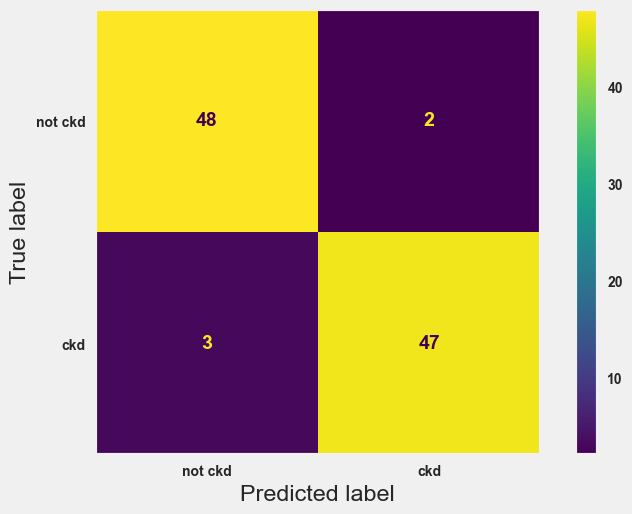

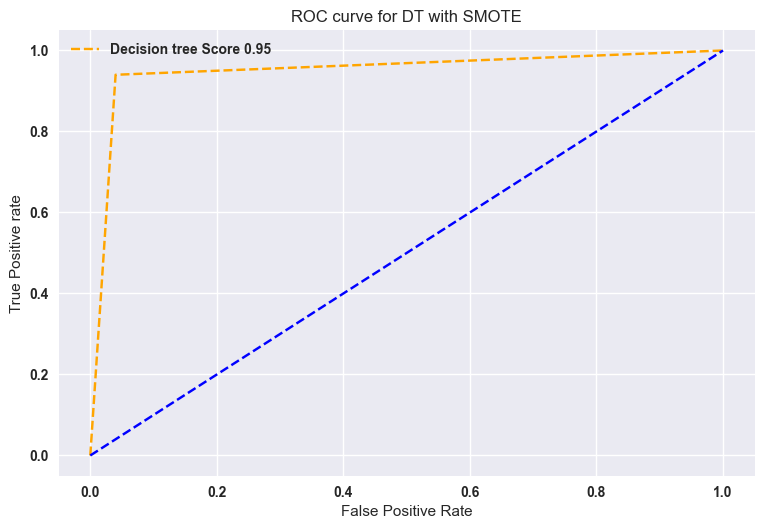

In [127]:
#decision tree roc 
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = dtc.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not ckd','ckd']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision tree Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for DT with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [129]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Get the root node
root_node = dtc.tree_.feature[0]

print("Root node feature index:", root_node)


Root node feature index: 11


              precision    recall  f1-score   support

     not ckd       0.80      0.56      0.66        50
         ckd       0.66      0.86      0.75        50

    accuracy                           0.71       100
   macro avg       0.73      0.71      0.70       100
weighted avg       0.73      0.71      0.70       100



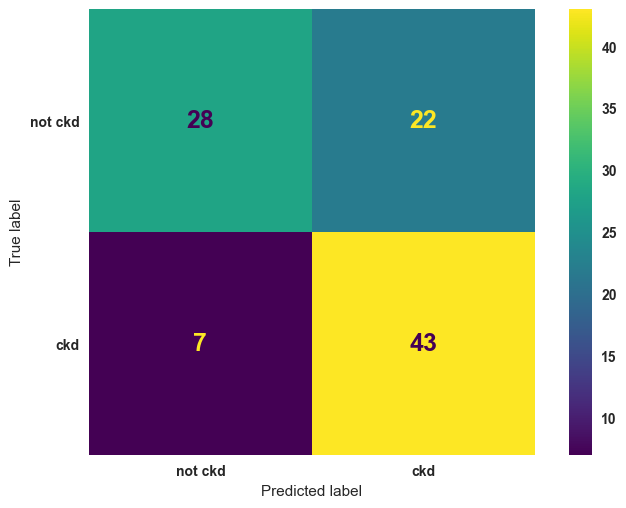

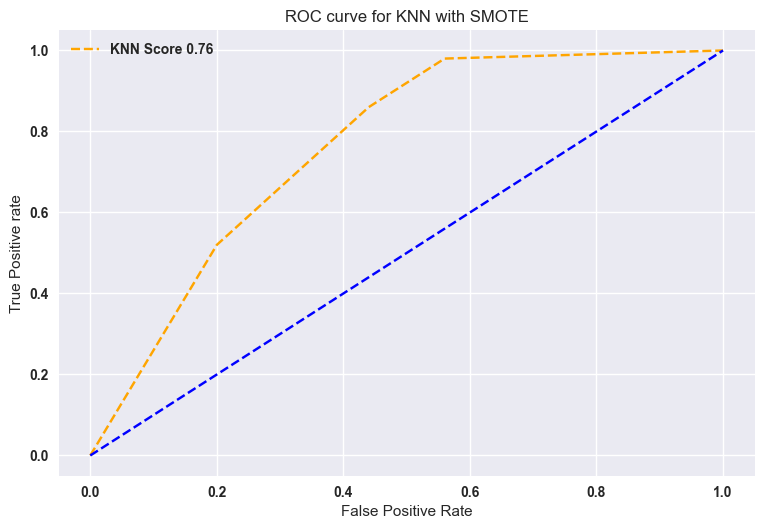

In [130]:
#roc for KNN n=3 with smote
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not ckd','ckd']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for KNN with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

              precision    recall  f1-score   support

     not ckd       0.94      0.96      0.95        50
         ckd       0.96      0.94      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



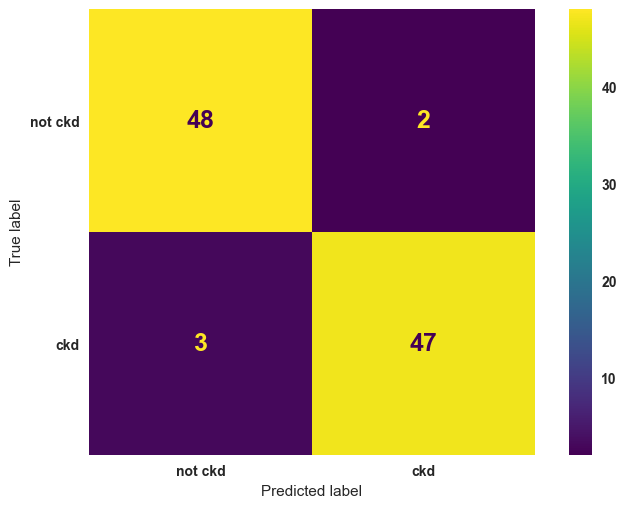

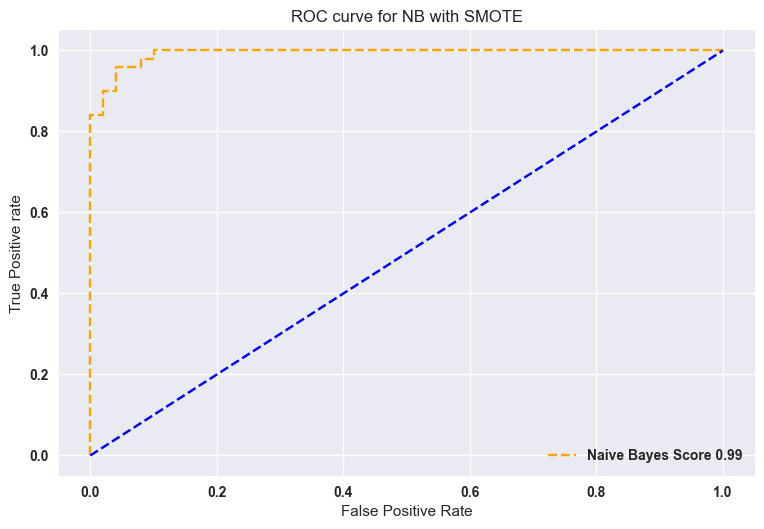

In [131]:
#roc for naive bayes NB_clf
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = NB_clf.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not ckd','ckd']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, NB_clf.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, NB_clf.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for NB with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

              precision    recall  f1-score   support

     not ckd       0.93      0.84      0.88        50
         ckd       0.85      0.94      0.90        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



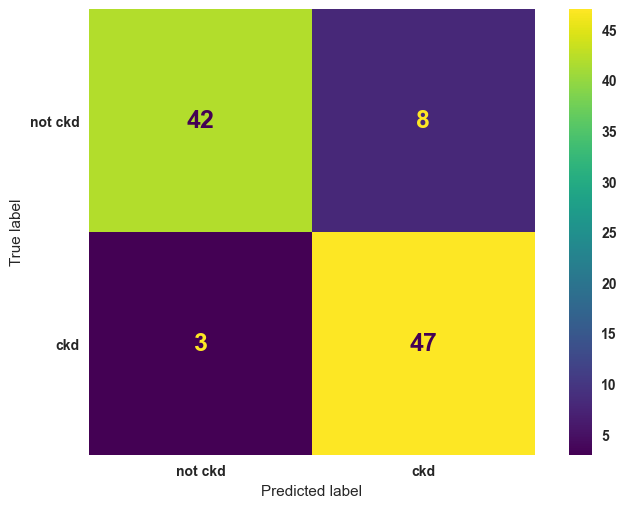

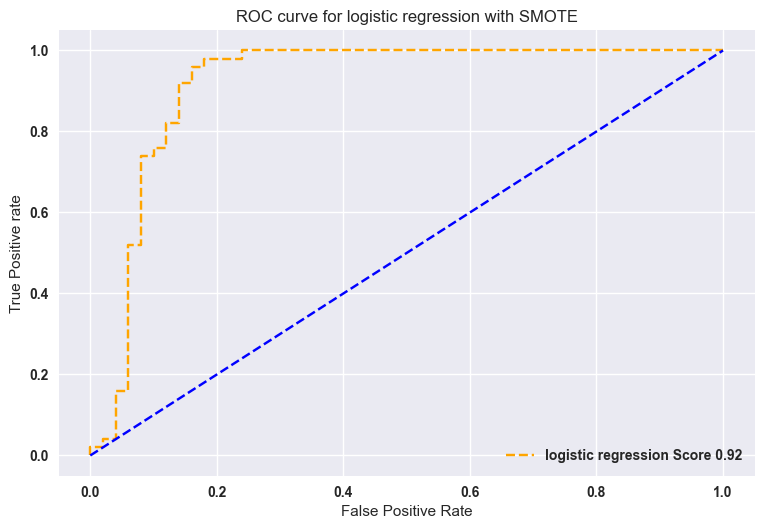

In [132]:
#roc for Logistic Regression logistic_regressor
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = logistic_regressor.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not ckd','ckd']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, logistic_regressor.predict_proba(X_test)[:, 1], pos_label=1)


#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_ab=round(roc_auc_score(y_test, logistic_regressor.predict_proba(X_test)[:, 1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='logistic regression Score '+str(AUC_Score_ab))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for logistic regression with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

              precision    recall  f1-score   support

     not ckd       0.93      0.84      0.88        50
         ckd       0.85      0.94      0.90        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



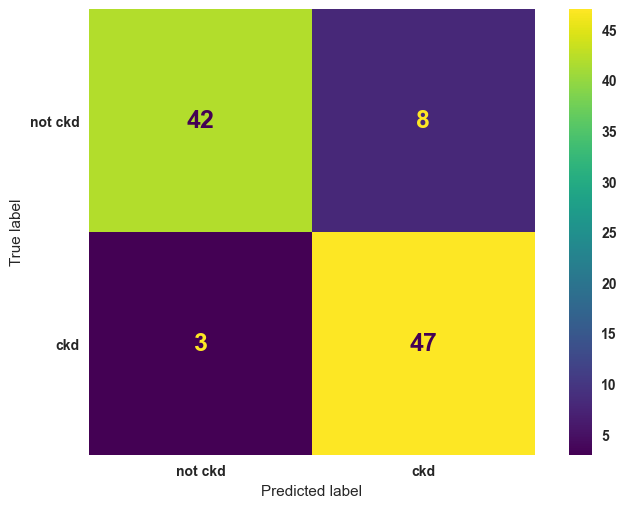

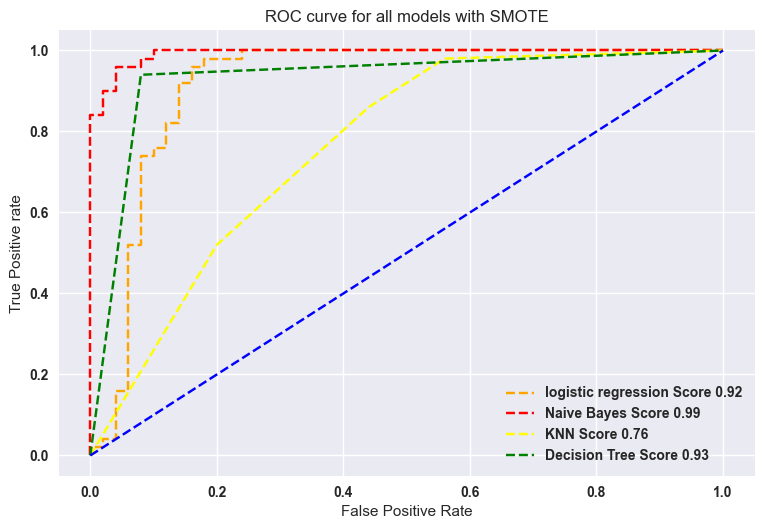

In [133]:
#roc curve for multiple models
#roc for all models
#classifier: knn
#dtc: decision tree
#NB_clf: naive bayes
#logistic_regressor: logistic regression
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

#Predict the response for test dataset
y_pred_ab = logistic_regressor.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ab)

target_names=['not ckd','ckd']
print(classification_report(y_test, y_pred_ab,target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.grid(False)
font = {'family' : 'Comic Sans MS',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
plt.show()


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, logistic_regressor.predict_proba(X_test)[:, 1], pos_label=1)
fpr2,tpr2,thresh2=roc_curve(y_test, NB_clf.predict_proba(X_test)[:,1],pos_label=1 )
fpr3,tpr3,thresh3=roc_curve(y_test,classifier.predict_proba(X_test)[:,1],pos_label=1)
fpr4,tpr4,thresh4=roc_curve(y_test,dtc.predict_proba(X_test)[:,1],pos_label=1)
#We can also plot the receiver operating characteristic curves 
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
AUC_Score_lr=round(roc_auc_score(y_test, logistic_regressor.predict_proba(X_test)[:, 1]),2)
AUC_Score_nb=round(roc_auc_score(y_test, NB_clf.predict_proba(X_test)[:,1]),2)
AUC_Score_kn=round(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]),2)
AUC_Score_dt=round(roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1]),2)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='logistic regression Score '+str(AUC_Score_lr))
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes Score '+str(AUC_Score_nb))
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN Score '+str(AUC_Score_kn))
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Decision Tree Score '+str(AUC_Score_dt))



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve for all models with SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();